### import the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import fetch_openml

### importing the boston house price dataset

In [2]:
house_price_dataframe = pd.read_csv("data/BostonHousing.csv")

In [3]:
house_price_dataframe.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# changed the  target column name from MEDV -> PRICE (price) column in the dataframe . Here price is in 1000 units . 24 = $24k
house_price_dataframe = house_price_dataframe.rename(columns={'medv': 'price'})

In [5]:
house_price_dataframe.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
house_price_dataframe.shape

(506, 14)

In [7]:
# checking the missing values
house_price_dataframe.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

### Now creating a co-relation between this features
### positive co-relation
### Negative co-relation

In [8]:
correlation_matrix = house_price_dataframe.corr()

### Creating a Heatmap to understand the corelation

<Axes: >

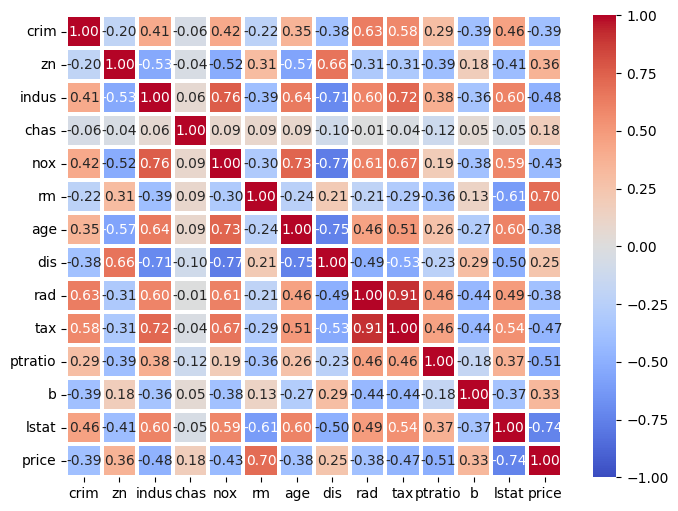

In [9]:
plt.figure(figsize=(8, 6)) # Set the figure size
sns.heatmap(correlation_matrix, 
            annot=True,          # Show correlation values in cells
            cmap='coolwarm',     # Color scheme (blue for negative, red for positive)
            vmin=-1, vmax=1,     # Range of correlation values
            
            fmt='.2f',           # Format for annotations (2 decimal places)
            linewidths=1.5)      # Add lines between cells for clarity

### Splitting the data and target

In [10]:
X = house_price_dataframe.drop(columns="price",axis=1)
Y = house_price_dataframe["price"]

In [11]:
print(X.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [12]:
print(Y.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64


### Split Train and test data

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [14]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


In [15]:
# tranning the model
model = XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### Evaluation

In [16]:
# Accuracy for prediction on tranning data
tranning_data_prediction = model.predict(X_train)

In [20]:
# R Square Error
score_1 = metrics.r2_score(Y_train,tranning_data_prediction)

#Mean Abosolute Error
score_2 = metrics.mean_absolute_error(Y_train,tranning_data_prediction)

print("R squared Error : ",score_1)
print("Mean Absolute Error : ",score_2)

R squared Error :  0.9999980039471451
Mean Absolute Error :  0.0091330346494618


### Visualising the Actual price and predicted data

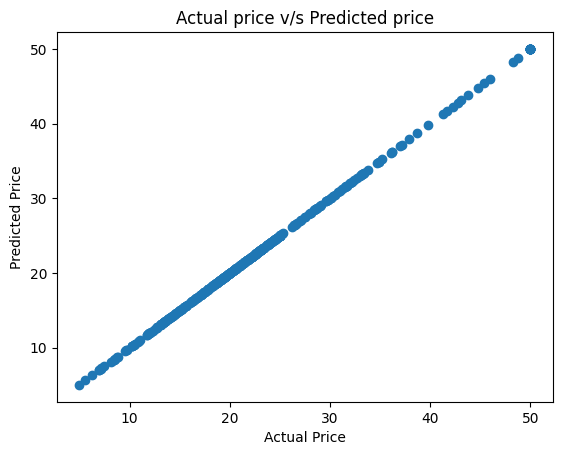

In [23]:
plt.scatter(Y_train,tranning_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price v/s Predicted price")
plt.show()

### Prediction on test data

In [21]:
#Accuracy on prediction on test data
test_data_prediction = model.predict(X_test)

In [22]:
# R Square Error
score_1 = metrics.r2_score(Y_test,test_data_prediction)

#Mean Abosolute Error
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R squared Error : ",score_1)
print("Mean Absolute Error : ",score_2)

R squared Error :  0.9051721149855378
Mean Absolute Error :  2.0748727686264927


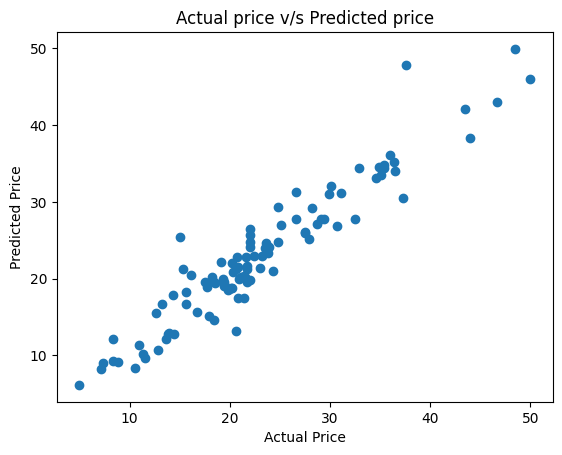

In [24]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price v/s Predicted price")
plt.show()